<a href="https://colab.research.google.com/github/reagenhuskey/cs290/blob/main/k_nearest_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
iris = load_iris()

In [31]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [32]:
df['species'] = iris.target

In [33]:
target_names = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

df['species_name'] = df['species'].map(target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [34]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [35]:
def centroid(df, method, k):
    if method == 'random':
      return df.sample(k, random_state=42)
    if method == 'specified':
      return df.groupby("species_name")[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].mean()

In [36]:
def k_clustering(df, k, max_iters=100, method='random'):
    centroids = centroid(df, method, k)
    for i in range(max_iters):
        distances = pd.DataFrame()
        for i in range(k):
            distances[i] = df.apply(lambda row: euclidean_distance(row[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], centroids.iloc[i][['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]), axis=1)
        df['cluster'] = distances.idxmin(axis=1)
        new_centroids = df.groupby('cluster')[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].mean()
        if new_centroids.equals(centroids):
            break
        centroids = new_centroids

    return df, centroids

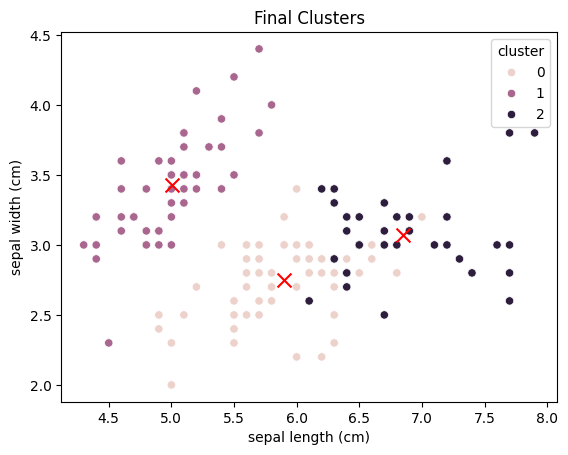

In [37]:
k=3
df_clustered, centroids = k_clustering(df, k, method='random')

plt.figure()
sns.scatterplot(data=df_clustered, x='sepal length (cm)', y='sepal width (cm)', hue='cluster')
plt.scatter(centroids['sepal length (cm)'], centroids['sepal width (cm)'], marker='x', color='red', s=100)
plt.title('Final Clusters')
plt.show()

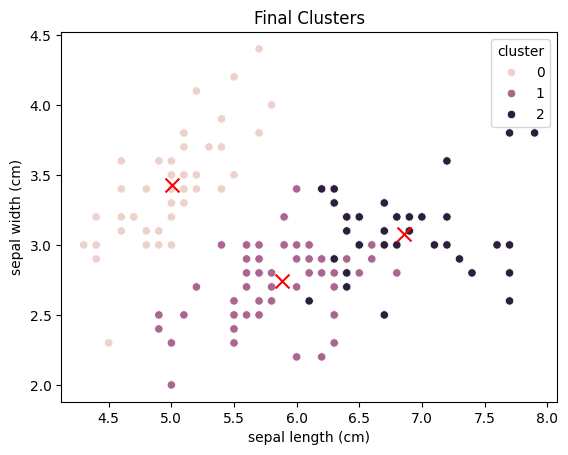

In [38]:
k=3
df_clustered, centroids = k_clustering(df, k, method='specified')

plt.figure()
sns.scatterplot(data=df_clustered, x='sepal length (cm)', y='sepal width (cm)', hue='cluster')
plt.scatter(centroids['sepal length (cm)'], centroids['sepal width (cm)'], marker='x', color='red', s=100)
plt.title('Final Clusters')
plt.show()